# Datamining

In [1]:
SEED = 26062019

test_size = 0.5 

import sys
import numpy as np
import pandas as pd
from sklearn import __version__ as sk_vers
import matplotlib.pyplot as plt
from matplotlib import __version__ as m_vers
#import pickle
#from yellowbrick import __version__ as yb_vers
#import random
#from sklearn import datasets, svm, model_selection, tree, preprocessing, metrics
#import sklearn.ensemble as ske
#import re
#import xgboost as xgb
#import seaborn as sns


print('Current versions Modules:\n')
print('Pandas version:\t\t' + pd.__version__)
print('Matplotlib version:\t' + m_vers)
print('numpy version:\t\t' + np.__version__)
print('sklearn version:\t' + sk_vers)

Current versions Modules:

Pandas version:		0.24.2
Matplotlib version:	3.1.0
numpy version:		1.16.4
sklearn version:	0.21.2


## Load data

In [2]:
df_bitm = pd.read_csv(r'data/BITM_Cancer_dataset.csv', sep='\t', header=None)
print('nr of entries: ', len(df_bitm))

df_bitm.head()

nr of entries:  100


,0,1,2,3,4,5,6,7,8,9,...,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835
0,Array.129,HER2+,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,HR+,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,HR+,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,Triple Neg,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,Triple Neg,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


(32, 36, 32)


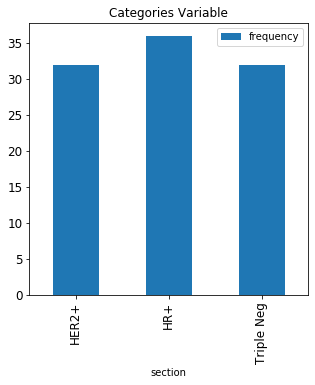

In [3]:
from collections import Counter

labels, values = zip(*Counter(df_bitm[1]).items())
print(values)
df = pd.DataFrame({'section':labels, 'frequency':values})
ax = df.plot(kind='bar',  title ="Categories Variable", figsize=(5, 5), x='section', legend=True, fontsize=12, rot=90)

### Import important modules

In [4]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold
import numpy as np

## Feature Reduction

In [5]:
X = df_bitm[df_bitm.columns[2:]]
y = df_bitm[df_bitm.columns[1]]


## Double Cross Validation

In [ ]:
def Recursive_feature_elimination(X_train_outer, y_train_outer, X_test_outer):
        rfe = RFECV(estimator=self.model, cv=StratifiedKFold(2))
        rfe.fit(X_train_outer, y_train_outer)
        log.info('Best number of features was: {0}'.format(rfe.n_features_))
        return rfe.transform(X_train_outer), rfe.transform(X_test_outer)
        # Assign selected features to data

Optimal number of features : 17


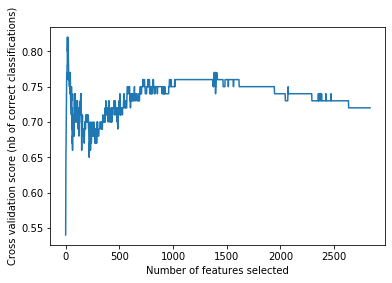

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [6]:
# large folds -> to ensure enough training & validation data
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
import pickle

SEED = 26062019

X = df_bitm[df_bitm.columns[2:]]
y = df_bitm[df_bitm.columns[1]]

hyperparam = [0.1, 1, 10, 100]
kfold_outer = StratifiedKFold(n_splits=3,shuffle=True,random_state=SEED)

pipe = make_pipeline(preprocessing.StandardScaler(), SVC(C=hyperparam[i]))
param_grid

## later omringen met kfold_outer
for i, (train, valid) in enumerate(kfold_outer.split(X, y)):
    # reset
    old_f1 = 0
    param = 0
    kfold_inner = StratifiedKFold(n_splits=3,shuffle=True,random_state=SEED)
    best_model = ''
    X_train, y_train, X_valid, y_valid = X.iloc[train], y.iloc[train], X.iloc[valid], y.iloc[valid]
    for i, (in_train, in_test) in enumerate(kfold_inner.split(X_train, y_train)):
        clf = SVC(C=hyperparam[i])
        clf.fit(X_train.iloc[in_train], y_train.iloc[in_train])
        y_pred = clf.predict(X_train.iloc[in_test])
        #print(clf.coef_[:10])
        f1 = f1_score(y_train.iloc[in_test], y_pred, average='macro')
        print('Iteration:', str(i), 'F1:', str(f1), 'C: ', str(hyperparam[i]))
        #print(classification_report(y_train.iloc[in_test], y_pred, target_names=['1', '2', '3']))
        if f1 > old_f1:
            pickle.dump(clf, open('models/optimal_model.sav', 'wb'))
            old_f1 = f1
            param = hyperparam[i]
        # if performance > old_performance # macro F1
        # return model
    # Load best model
    print('F1-Inner:', old_f1, 'C: ', param)
    optimal_model = pickle.load(open('models/optimal_model.sav', 'rb'))
    final_y_pred = optimal_model.predict(X_valid)
    final_f1 = f1_score(y_valid, final_y_pred, average='macro')
    print('F1-final:', final_f1)
    

C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

Iteration: 0 F1: 0.17777777777777778 C:  0.1
Iteration: 1 F1: 0.30501089324618735 C:  1
Iteration: 2 F1: 0.6174089068825911 C:  10
F1-Inner: 0.6174089068825911 C:  10
F1-final: 0.6874762808349146
Iteration: 0 F1: 0.17777777777777778 C:  0.1
Iteration: 1 F1: 0.30069930069930073 C:  1
Iteration:

C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 

 2 F1: 0.8167832167832167 C:  10
F1-Inner: 0.8167832167832167 C:  10
F1-final: 0.6851851851851852
Iteration: 0 F1: 0.16666666666666666 C:  0.1
Iteration: 1 F1: 0.43469785575048725 C:  1
Iteration: 2 F1: 0.5423280423280423 C:  10
F1-Inner: 0.5423280423280423 C:  10
F1-final: 0.65


C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# Hyperparameter tuning

p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

In [ ]:
class PipelineRFE(Pipeline):
    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
#from yellowbrick.model_selection import rfecv
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

models = [
    # Support Vector Machine - 1
    Pipeline([
                ('clf', SVC(gamma='auto', random_state=SEED))
            ]),
    # Naive Bayes - 2
    Pipeline([
                ('clf', MultinomialNB()),
            ]),
    # K Nearest Neighbours - 3
    Pipeline([
                ('clf', KNeighborsClassifier()), # hidden_layer_sizes=(5, 2), , 
            ]),
    # Random Forest - 4
    Pipeline([
                ('clf', RandomForestClassifier(random_state=SEED)), # n_estimators=100, max_depth=2,
            ]),
    ]

names = ['SVM', 'Naive Bayes', 'KNN', 'Random Forest']
pal = ['r', 'c', 'b', 'y', 'magenta', 'darkgreen', 'indigo', 'black', 'orange'] 

In [131]:
print(df_bitm[df_bitm.columns[1]].unique())

['HER2+' 'HR+' 'Triple Neg']


In [99]:
len(n_features[0])

50

In [206]:
# large folds -> to ensure enough training & validation data
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from yellowbrick.model_selection import RFECV
import pickle
from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import EnsembleVoteClassifier

SEED = 26062019

X = df_bitm[df_bitm.columns[2:]]
X = X.replace(2, 3)
X = X.replace(1, 2)
X = X.replace(0, 1)
X = X.replace(-1, 0)

y = df_bitm[df_bitm.columns[1]]

enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)  #['HER2+', 'HR+', 'Triple Neg']


#enc = preprocessing.LabelEncoder()
#y = enc.fit_transform(y)

#C_range = 10.**np.arange(-5, 1)
#penalty_options = ['l1', 'l2']

#pipe = make_pipeline(RFECV(estimator=svc, cv=StratifiedKFold(y, 3), scoring='f1'), SVC())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=SEED)

sfm = SelectFromModel(LassoCV(cv=10))
sfm.fit(X_train,y_train)
#X = feat.fit_transform(X, y)
print('Before Feature Selection: ', len(X_train.columns))
X_train = sfm.transform(X_train) #.shape[1]
print('After Feature Selection: ', len(X_train[0]))
#print(len(X_train[n_features]))
#print(èlgeok)
## later omringen met kfold_outer
old_f1 = 0
param = 0
best_model = ''

for nr in range(len(models)):
    estimator_list = []
    estimator = models[nr]
    if names[nr] == 'SVM':
        param_grid =  {
                'clf__kernel': ['linear', 'poly', 'sigmoid'], # 'rbf' -> not rbf as it is prone to overfitting!
                'clf__C': [ 0.01, 0.01, 0.1, 1, 10, 100], # 0.01, 0.01, 0.1,
            }
    elif names[nr] == 'Random Forest':
        param_grid =  {
            'clf__max_depth': [5, 10, 20, 30],
            'clf__n_estimators': [10, 100]
            }
    elif names[nr] == 'KNN':
        param_grid = { 
            'clf__leaf_size': [5, 10, 20, 30, 40],
            'clf__n_neighbors': [3, 5, 7, 9]
            }
    elif names[nr] == 'Naive Bayes':
        param_grid = { 
            'clf__alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
            }
    kfold_outer = StratifiedKFold(n_splits=3,shuffle=True,random_state=SEED)
    for i, (train, valid) in enumerate(kfold_outer.split(X_train, y_train)):
        # reset
        
        #kfold_inner = StratifiedKFold(n_splits=3,shuffle=True,random_state=SEED)
        
        X_tr, y_tr, X_valid, y_valid = X_train[train], y_train[train], X_train[valid], y_train[valid]
        grid = GridSearchCV(estimator, param_grid, cv=3, scoring='f1_micro')

        grid.fit(X_tr, y_tr) 
        y_pred = grid.predict(X_valid)
        f1 = f1_score(y_valid, y_pred, average='micro')
        print('F1:', str(f1), 'Best params:', str(grid.best_params_))  # print best hyperparam
        print(classification_report(y_valid, y_pred, target_names=['1', '2', '3']))
        #estimator_list.append(grid)
    if f1 > old_f1:
        print('New Best')
        print('Final F1:', str(f1), 'Best params:', str(grid.best_params_))
        #eclf1 = EnsembleVoteClassifier(clfs=estimator_list, voting='hard', refit=False)
        pickle.dump(grid, open('models/optimal_model.sav', 'wb'))
        old_f1 = f1
        param = grid.best_params_
        best_model = names[nr]
        
print('Best model:', best_model, ' F1-final:', old_f1, 'Param:', param)    

Before Feature Selection:  2834
After Feature Selection:  40
F1: 0.9354838709677419 Best params: {'clf__C': 1, 'clf__kernel': 'linear'}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92        12
           3       1.00      0.78      0.88         9

    accuracy                           0.94        31
   macro avg       0.95      0.93      0.93        31
weighted avg       0.94      0.94      0.93        31

F1: 0.9 Best params: {'clf__C': 1, 'clf__kernel': 'poly'}
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.83      0.91      0.87        11
           3       0.90      1.00      0.95         9

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: Depreca

F1: 0.896551724137931 Best params: {'clf__C': 1, 'clf__kernel': 'linear'}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.90      0.82      0.86        11
           3       0.80      0.89      0.84         9

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

New Best
Final F1: 0.896551724137931 Best params: {'clf__C': 1, 'clf__kernel': 'linear'}
F1: 0.8387096774193549 Best params: {'clf__alpha': 1}
              precision    recall  f1-score   support

           1       0.88      0.70      0.78        10
           2       0.73      0.92      0.81        12
           3       1.00      0.89      0.94         9

    accuracy                           0.84        31
   macro avg       0.87      0.84      0.84        31
weighted avg       0.86      0.84      0.84        31

F1: 0.766666666666666

C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


F1: 0.6774193548387096 Best params: {'clf__leaf_size': 5, 'clf__n_neighbors': 5}
              precision    recall  f1-score   support

           1       1.00      0.60      0.75        10
           2       0.55      0.92      0.69        12
           3       0.80      0.44      0.57         9

    accuracy                           0.68        31
   macro avg       0.78      0.65      0.67        31
weighted avg       0.77      0.68      0.67        31



C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


F1: 0.8000000000000002 Best params: {'clf__leaf_size': 5, 'clf__n_neighbors': 3}
              precision    recall  f1-score   support

           1       0.75      0.90      0.82        10
           2       1.00      0.64      0.78        11
           3       0.73      0.89      0.80         9

    accuracy                           0.80        30
   macro avg       0.83      0.81      0.80        30
weighted avg       0.83      0.80      0.80        30



C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


F1: 0.7931034482758621 Best params: {'clf__leaf_size': 10, 'clf__n_neighbors': 9}
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         9
           2       0.78      0.64      0.70        11
           3       0.88      0.78      0.82         9

    accuracy                           0.79        29
   macro avg       0.80      0.80      0.79        29
weighted avg       0.80      0.79      0.79        29



C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


F1: 0.9032258064516129 Best params: {'clf__max_depth': 10, 'clf__n_estimators': 100}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.85      0.92      0.88        12
           3       0.88      0.78      0.82         9

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


F1: 0.8000000000000002 Best params: {'clf__max_depth': 5, 'clf__n_estimators': 100}
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.75      0.82      0.78        11
           3       0.86      0.67      0.75         9

    accuracy                           0.80        30
   macro avg       0.81      0.79      0.80        30
weighted avg       0.80      0.80      0.80        30

F1: 0.896551724137931 Best params: {'clf__max_depth': 10, 'clf__n_estimators': 100}
              precision    recall  f1-score   support

           1       1.00      0.78      0.88         9
           2       0.83      0.91      0.87        11
           3       0.90      1.00      0.95         9

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.91      0.90      0.90        29

Best model: SVM  F1-final: 0.896551724137931 Param: {'clf__C': 1, 'clf

C:\Users\levrex\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [207]:
print('Before Feature Selection: ', len(X_test.columns))
X_test_t = sfm.transform(X_test) #.shape[1]
print('After Feature Selection: ', len(X_test_t[0]))
y_pred =  grid.predict(X_test_t)
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 final:', str(f1), 'Best params:', str(grid.best_params_))  # print best hyperparam
print(classification_report(y_test, y_pred, target_names=['0', '1', '2']))

Before Feature Selection:  2834
After Feature Selection:  40
F1 final: 0.8000000000000002 Best params: {'clf__max_depth': 10, 'clf__n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.50      1.00      0.67         2
           2       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.83      0.87      0.81        10
weighted avg       0.90      0.80      0.81        10



Confusion matrix, without normalization
[[3 0 0]
 [0 2 0]
 [0 2 3]]


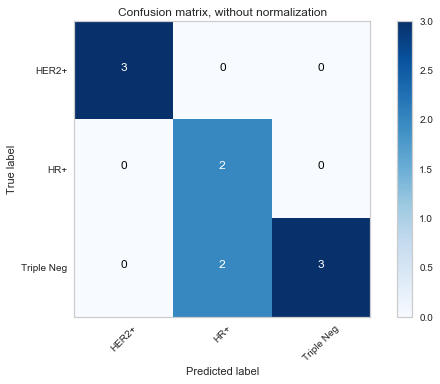

In [209]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


cnf_matrix = confusion_matrix(y_test, y_pred,labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
ax = plt.gca()
ax.grid(False)
plot_confusion_matrix(cnf_matrix, classes=['HER2+', 'HR+', 'Triple Neg'],
                      title='Confusion matrix, without normalization')